<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/python-code-for-FinancialAnalysis-book/blob/master/2020_6_9_chap13_bond_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests_html

     |████████████████████████████████| 153kB 7.1MB/s 
     |████████████████████████████████| 133kB 40.9MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
  Created wheel for parse: filename=parse-1.15.0-cp36-none-any.whl size=23710 sha256=e5959ba8048c523fffef4f5a87e0bb3cb3217b63e90b37bd83b442c3123f9078
  Stored in directory: /root/.cache/pip/wheels/07/ee/c8/eced0759f09fc635398ab1b8e89c38549b28e5db7fd4a53ba5
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13484 sha256=f07aa9c643b509477cf2c062bae206fb170ef831e800e4b57fbd553309143f31
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built parse fake-useragent
ERROR: kaggle 1.5.6 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.9 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is i

In [ ]:
pip install yahoo_fin

In [ ]:
pip install requests

In [ ]:
pip install bs4

In [ ]:
from yahoo_fin.stock_info import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
from tabulate import tabulate
import datetime as dt#get current date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from yahoo_fin.stock_info import get_quote_table
import requests
from bs4 import BeautifulSoup
import matplotlib.ticker as mtick
from tabulate import tabulate
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def html_beautifulsoup(url):
    response = requests.get(url)
    html = response.content

    #beautifulsoup html will not look like soure
    #review beautifulsoup html to use find and findall
    soup = BeautifulSoup(html,"lxml")
    return soup

#soup_html: soup html is not same as source html
def yahoo_description(soup_html):
    element = soup_html.find('h1',class_='D(ib) Fz(16px) Lh(18px)')
    return element.text  

In [ ]:
def Usr_input():
  Ticker = input('Please enter ticker(Default = JNJ)-->') or 'JNJ'
  Ticker_bond = input('Please enter bond ticker(^IRX,^FVX,^TNX,^TYX Default = ^IRX)-->') or '^IRX'
  Start = input('Enter start date(Default = 2000-01-01,)-->') or '2000-01-01'
  End = input('Enter end date(Default = Yesterday,)-->') or '2005-01-01'
  T_interval = input('Enter date interval(1d,1wk,1mo Default = 1mo)-->') or '1mo'
  return Ticker,Ticker_bond, Start, End, T_interval

In [ ]:
def calculate_ret(stock_a,stock_M,start,end_t,T_interval):
  Stock_price_a = get_data(stock_a,start_date=start,end_date=end_t,index_as_date=True,interval = T_interval)['adjclose'].dropna()
  Ret_a = Stock_price_a.pct_change()[1:]
  Stock_price_M = get_data(stock_M,start_date=start,end_date=end_t,index_as_date=True,interval = T_interval)['adjclose'].dropna()
  Ret_M = Stock_price_M.pct_change()[1:]
  Ret = pd.DataFrame([Ret_a,Ret_M])
  Ret = Ret.T
  Ret.columns = [stock_a,'Bond']
  return Ret

In [ ]:
(Ticker,Ticker_bond,macro_start,macro_end,macro_T_interval) = Usr_input()

Please enter ticker(Default = JNJ)-->JNJ
Please enter bond ticker(^IRX,^FVX,^TNX,^TYX Default = ^IRX)-->^IRX
Enter start date(Default = 2000-01-01,)-->2000-01-01
Enter end date(Default = Yesterday,)-->
Enter date interval(1d,1wk,1mo Default = 1mo)-->1mo


Print result summury

In [ ]:
ret = calculate_ret(Ticker,Ticker_bond,macro_start,macro_end,macro_T_interval)
ret_M = ret['Bond']
ret_a = ret[Ticker]

ret_Mc = sm.add_constant(ret_M)
results = sm.OLS(ret_a,ret_Mc).fit()
print('                                 inflation Model')
print(results.summary())

                                 inflation Model
                            OLS Regression Results                            
Dep. Variable:                    JNJ   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.08861
Date:                Wed, 15 Jul 2020   Prob (F-statistic):              0.767
Time:                        16:07:11   Log-Likelihood:                 79.643
No. Observations:                  59   AIC:                            -155.3
Df Residuals:                      57   BIC:                            -151.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

Anova test

In [ ]:
model = ols(Ticker+' ~ Bond',ret).fit()
anova_table = anova_lm(model)
print(anova_table)

            df    sum_sq   mean_sq         F   PR(>F)
Bond       1.0  0.000361  0.000361  0.088605  0.76704
Residual  57.0  0.232209  0.004074       NaN      NaN


Regression plot

Text(0, 0.5, 'JNJ - Johnson & Johnson')

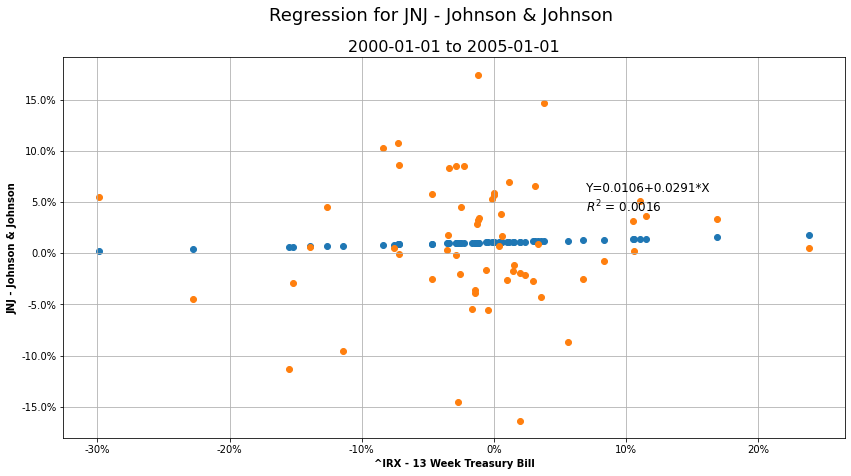

In [ ]:
soup_html = html_beautifulsoup("https://finance.yahoo.com/quote/"  + Ticker)
soup_html_ = html_beautifulsoup("https://finance.yahoo.com/quote/"  + Ticker_bond)
Ticker_name = yahoo_description(soup_html)
bond_name = yahoo_description(soup_html_)

plt.figure(figsize=(14,7))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
(a,b) = results.params
R_sq = results.rsquared
predict = a+np.multiply(ret_M,b)
plt.scatter(ret_M*100,predict*100)
plt.scatter(ret_M*100,ret_a*100)
plt.text(7, 6, 'Y={:.4f}+{:.4f}*X'.format(a,b), fontsize=12)
plt.text(7, 4, r'$R^2$ = {:.4f}'.format(R_sq), fontsize=12)
plt.title(macro_start+' to '+macro_end,fontsize = 16)
plt.suptitle('Regression for '+Ticker_name, fontsize = 18)
plt.grid(True)
plt.xlabel(bond_name,fontweight='bold')
plt.ylabel(Ticker_name,fontweight='bold')

Fit and diagnostic for all observation

In [ ]:
pd.set_option('precision', 2)
Resid = predict-ret_a
std_resid = (Resid-Resid.mean())/Resid.std()
SE = np.sqrt(abs(Resid))
lower = predict-SE*1.97
upper = predict+SE*1.97
report = pd.concat([ret_a, predict,SE,lower,upper,Resid,std_resid],axis=1)
report.columns = [Ticker_name,'Fit','SE Fit','lower bound of 95CI','upper bound of 95CI','Resid','Std Resid']
pd.set_option('display.max_columns', None)
print(tabulate(report,headers=report.columns,tablefmt="github"))

|                     |   JNJ - Johnson & Johnson |        Fit |    SE Fit |   lower bound of 95CI |   upper bound of 95CI |        Resid |   Std Resid |
|---------------------|---------------------------|------------|-----------|-----------------------|-----------------------|--------------|-------------|
| 2000-02-01 00:00:00 |              -0.163398    | 0.0111894  | 0.417837  |            -0.81195   |             0.834328  |  0.174588    |   2.75923   |
| 2000-03-01 00:00:00 |              -0.0172503   | 0.0110232  | 0.168147  |            -0.320227  |             0.342274  |  0.0282736   |   0.446843  |
| 2000-04-01 00:00:00 |               0.174378    | 0.010254   | 0.405122  |            -0.787836  |             0.808344  | -0.164124    |  -2.59385   |
| 2000-05-01 00:00:00 |               0.0848486   | 0.0097858  | 0.273976  |            -0.529947  |             0.549518  | -0.0750628   |  -1.18631   |
| 2000-06-01 00:00:00 |               0.146559    | 0.0117239  | 0.367199  |

In [ ]:
#save report to downloads folder
report.to_csv('chapter_13_report.csv') 
files.download('chapter_13_report.csv')
print("finish downloading chapter_13 file to 'Downloads folder'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

finish downloading chapter_13 file to 'Downloads folder'
